In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [11]:
data=pd.read_csv(r"C:\Users\shashank agarwal\Downloads\Automobile_insurance_fraud.csv")
data.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [12]:
data.shape

(1000, 40)

In [13]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [14]:
data.drop(columns=["policy_bind_date","_c39"],inplace=True)

In [15]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

In [16]:
data.head(6)

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
5,256,39,104594,OH,250/500,1000,1351.10,0,478456,FEMALE,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y


In [18]:
print(data["policy_state"].value_counts())
print(data["policy_csl"].value_counts())
print(data["insured_sex"].value_counts())
print(data["police_report_available"].value_counts())
print(data["auto_make"].value_counts())
print(data["auto_model"].value_counts())
print(data["fraud_reported"].value_counts())"auto_model"].value_counts())
print(data["fraud_reported"])

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
NO     343
?      343
YES    314
Name: police_report_available, dtype: int64
Suburu        80
Saab          80
Dodge         80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64
RAM               43
Wrangler          42
Neon              37
A3                37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
Camry             28
92x               28
Forrestor         28
E400              27
95                27
F150              27
Grand Cherokee    25
93                25
Tahoe             24
Maxima            24
Escape      

In [23]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [25]:
data_sub=data[['insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries']]
data_sub.head()

,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries
0,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1
1,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0
2,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2
3,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1
4,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0


In [45]:
data.drop(columns=["incident_date","incident_location"],inplace=True)
print(data["insured_education_level"].value_counts())
print(data["insured_occupation"].value_counts())
print(data["insured_hobbies"].value_counts())
print(data["insured_relationship"].value_counts())
print(data["incident_type"].value_counts())
print(data["collision_type"].value_counts())
print(data["incident_severity"].value_counts())
print(data["authorities_contacted"].value_counts())
print(data["incident_state"].value_counts())
print(data["incident_city"].value_counts())
print(data["property_damage"].value_counts())

3    161
2    160
0    145
4    144
5    143
6    125
1    122
Name: insured_education_level, dtype: int64
6     93
9     85
12    78
11    76
3     76
2     74
13    72
8     71
7     71
1     69
0     65
10    63
5     54
4     53
Name: insured_occupation, dtype: int64
15    64
8     57
13    57
3     56
9     55
4     55
12    55
11    54
19    53
10    52
18    50
16    49
0     49
2     48
14    47
5     46
7     43
17    41
6     35
1     34
Name: insured_hobbies, dtype: int64
3    183
2    177
1    174
0    170
5    155
4    141
Name: insured_relationship, dtype: int64
0    419
2    403
3     94
1     84
Name: incident_type, dtype: int64
2    292
3    276
1    254
0    178
Name: collision_type, dtype: int64
1    354
2    280
0    276
3     90
Name: incident_severity, dtype: int64
4    292
1    223
3    198
0    196
2     91
Name: authorities_contacted, dtype: int64
1    262
4    248
6    217
5    110
0    110
3     30
2     23
Name: incident_state, dtype: int64
6    157
0    152

In [35]:
from sklearn.preprocessing import LabelEncoder

data_frame=["policy_state","policy_csl","insured_sex","police_report_available","auto_make","auto_model","fraud_reported",
                "insured_education_level",
"insured_occupation",
"insured_hobbies",
"insured_relationship",
"incident_type",
"collision_type",
"incident_severity",
"authorities_contacted",
"incident_state",
"incident_city",
"property_damage"]

data[data_frame]=data[data_frame].apply(LabelEncoder().fit_transform)  
data.head(1000)

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,1,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,2,1000,1310.80,0,431289,0,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,0,0,1000,1436.79,0,608177,0,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,2,1,500,1383.49,3000000,442797,0,...,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,0,2,2000,1356.92,5000000,441714,1,...,1,2,46980,5220,5220,36540,1,5,1998,0


In [39]:
data["fraud_reported"].value_counts() 

0    753
1    247
Name: fraud_reported, dtype: int64

In [40]:
# We need to do data balancing 

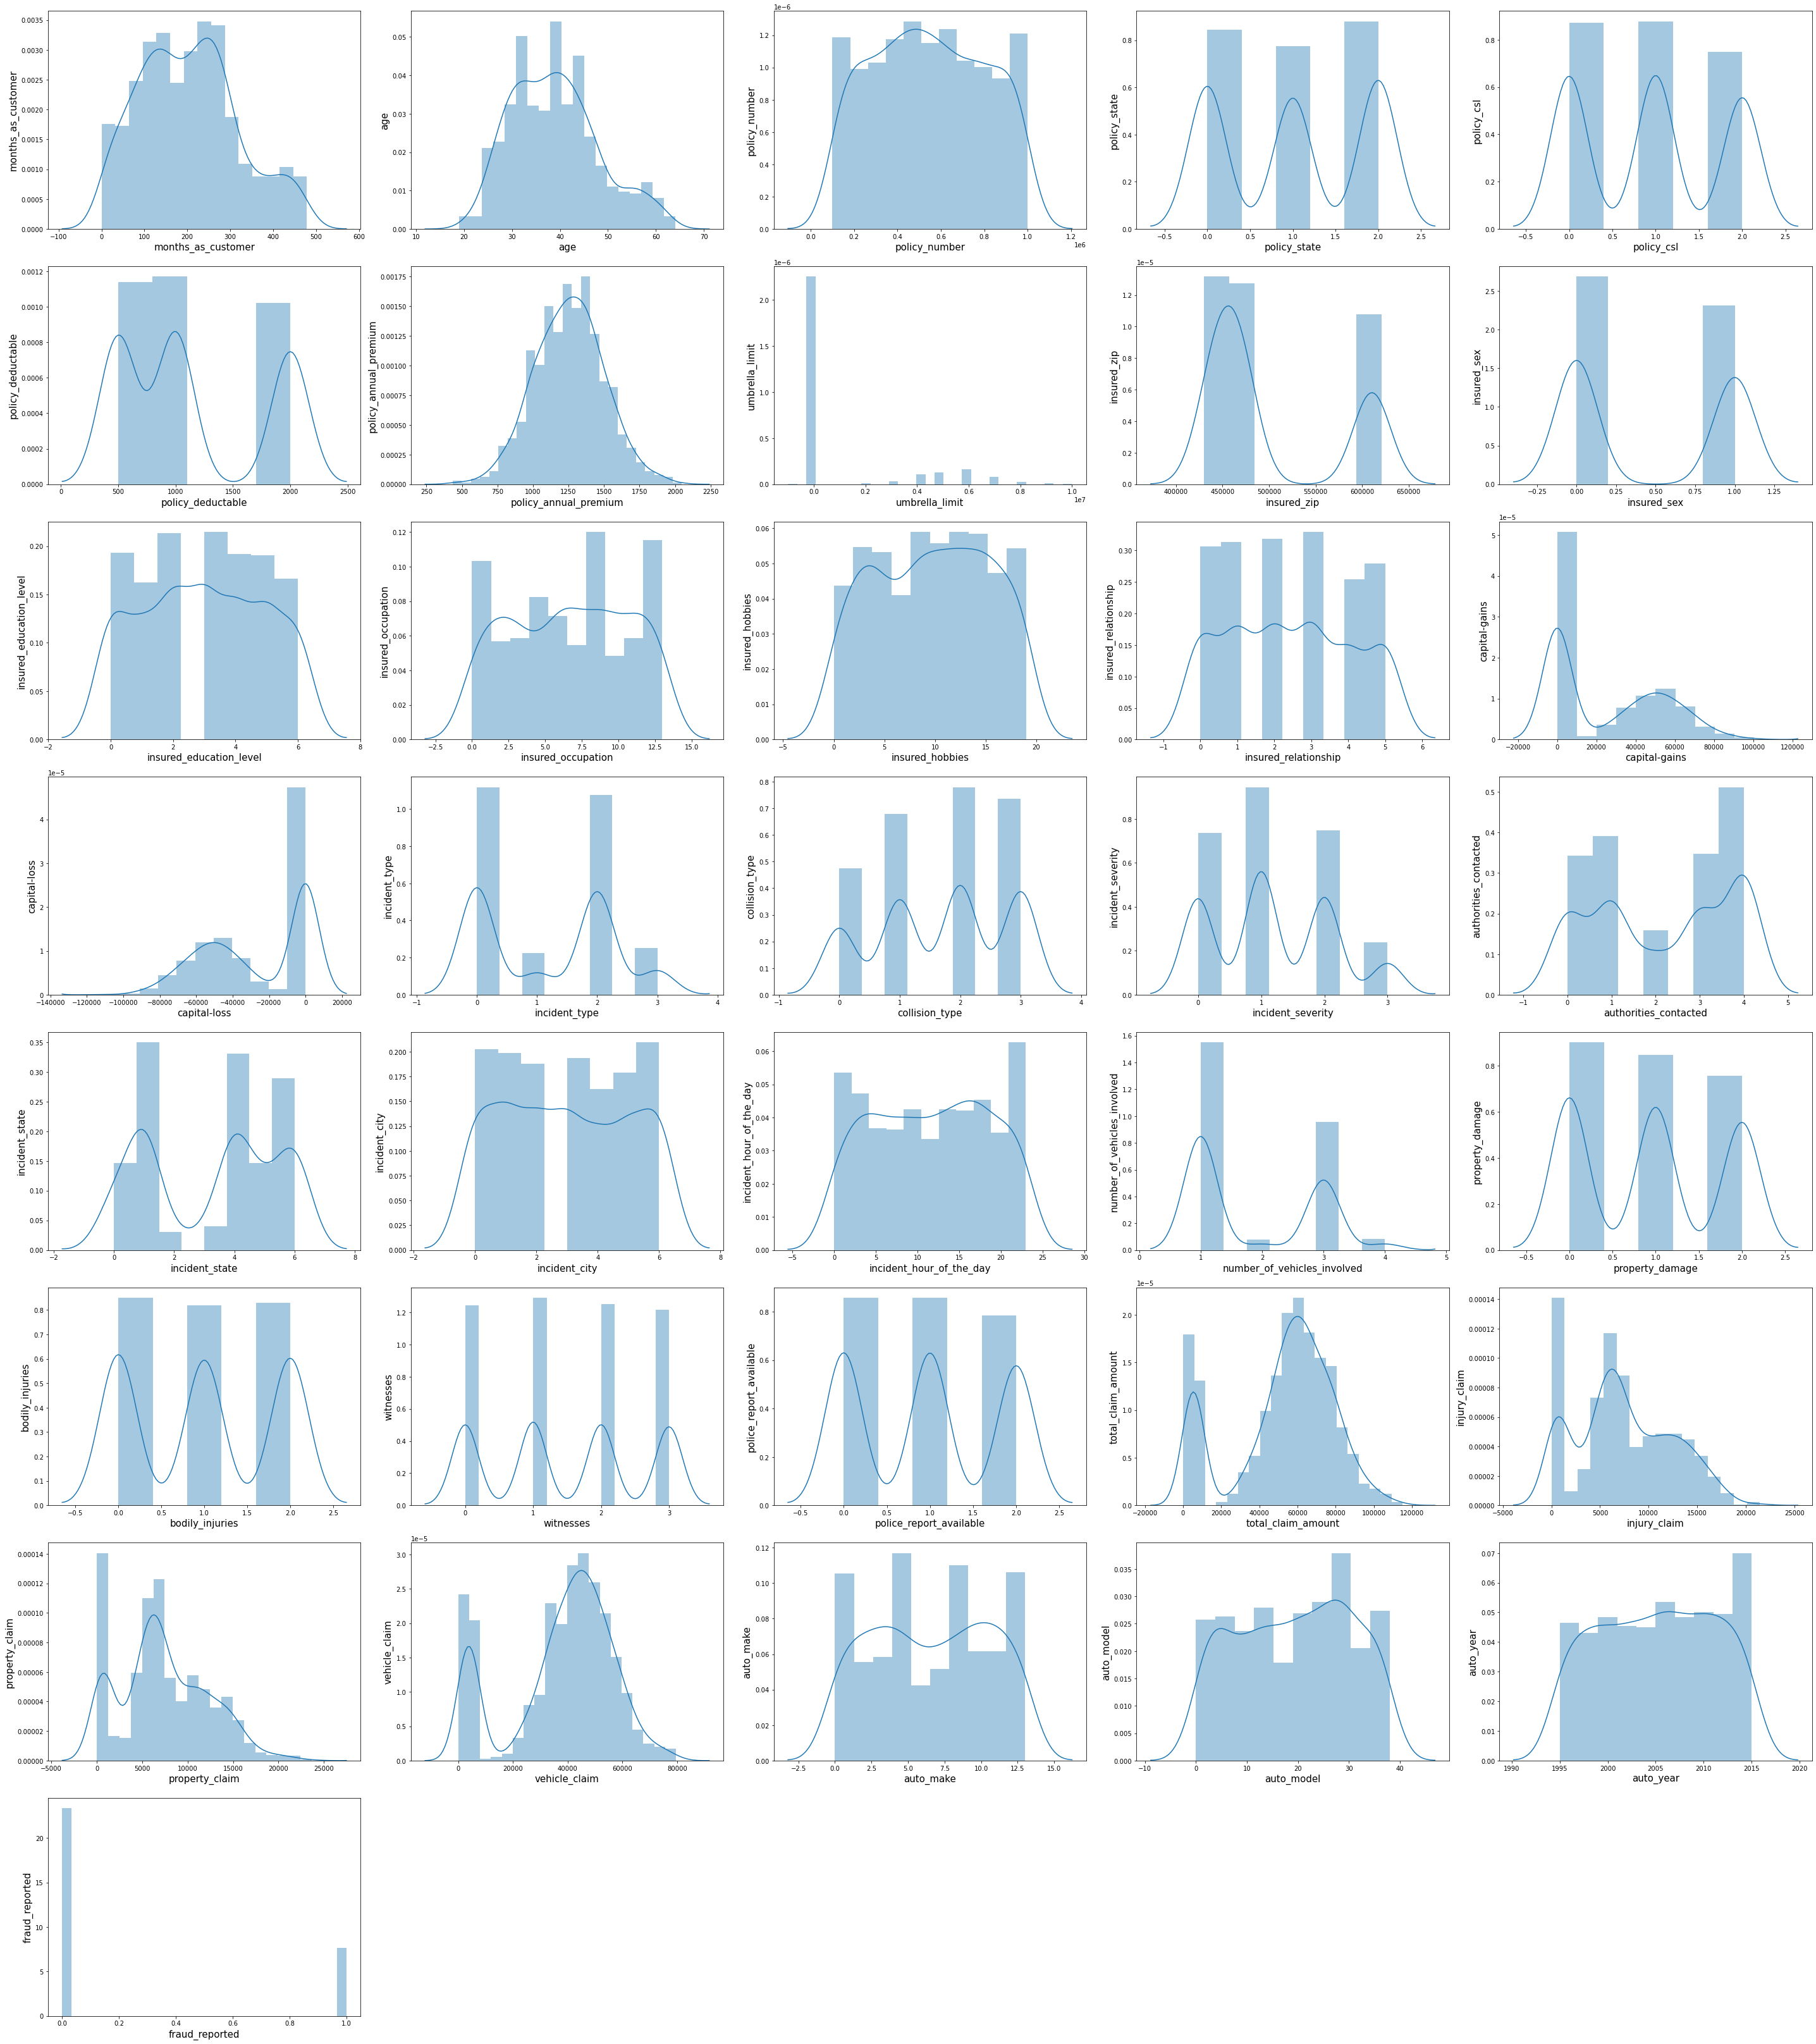

In [46]:
plt.figure(figsize=(40,45))
plotnumber=1
for column in data:
    if plotnumber<=40:
        ax=plt.subplot(8,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
        plt.ylabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [47]:
corr=data.corr()
corr.shape

(36, 36)

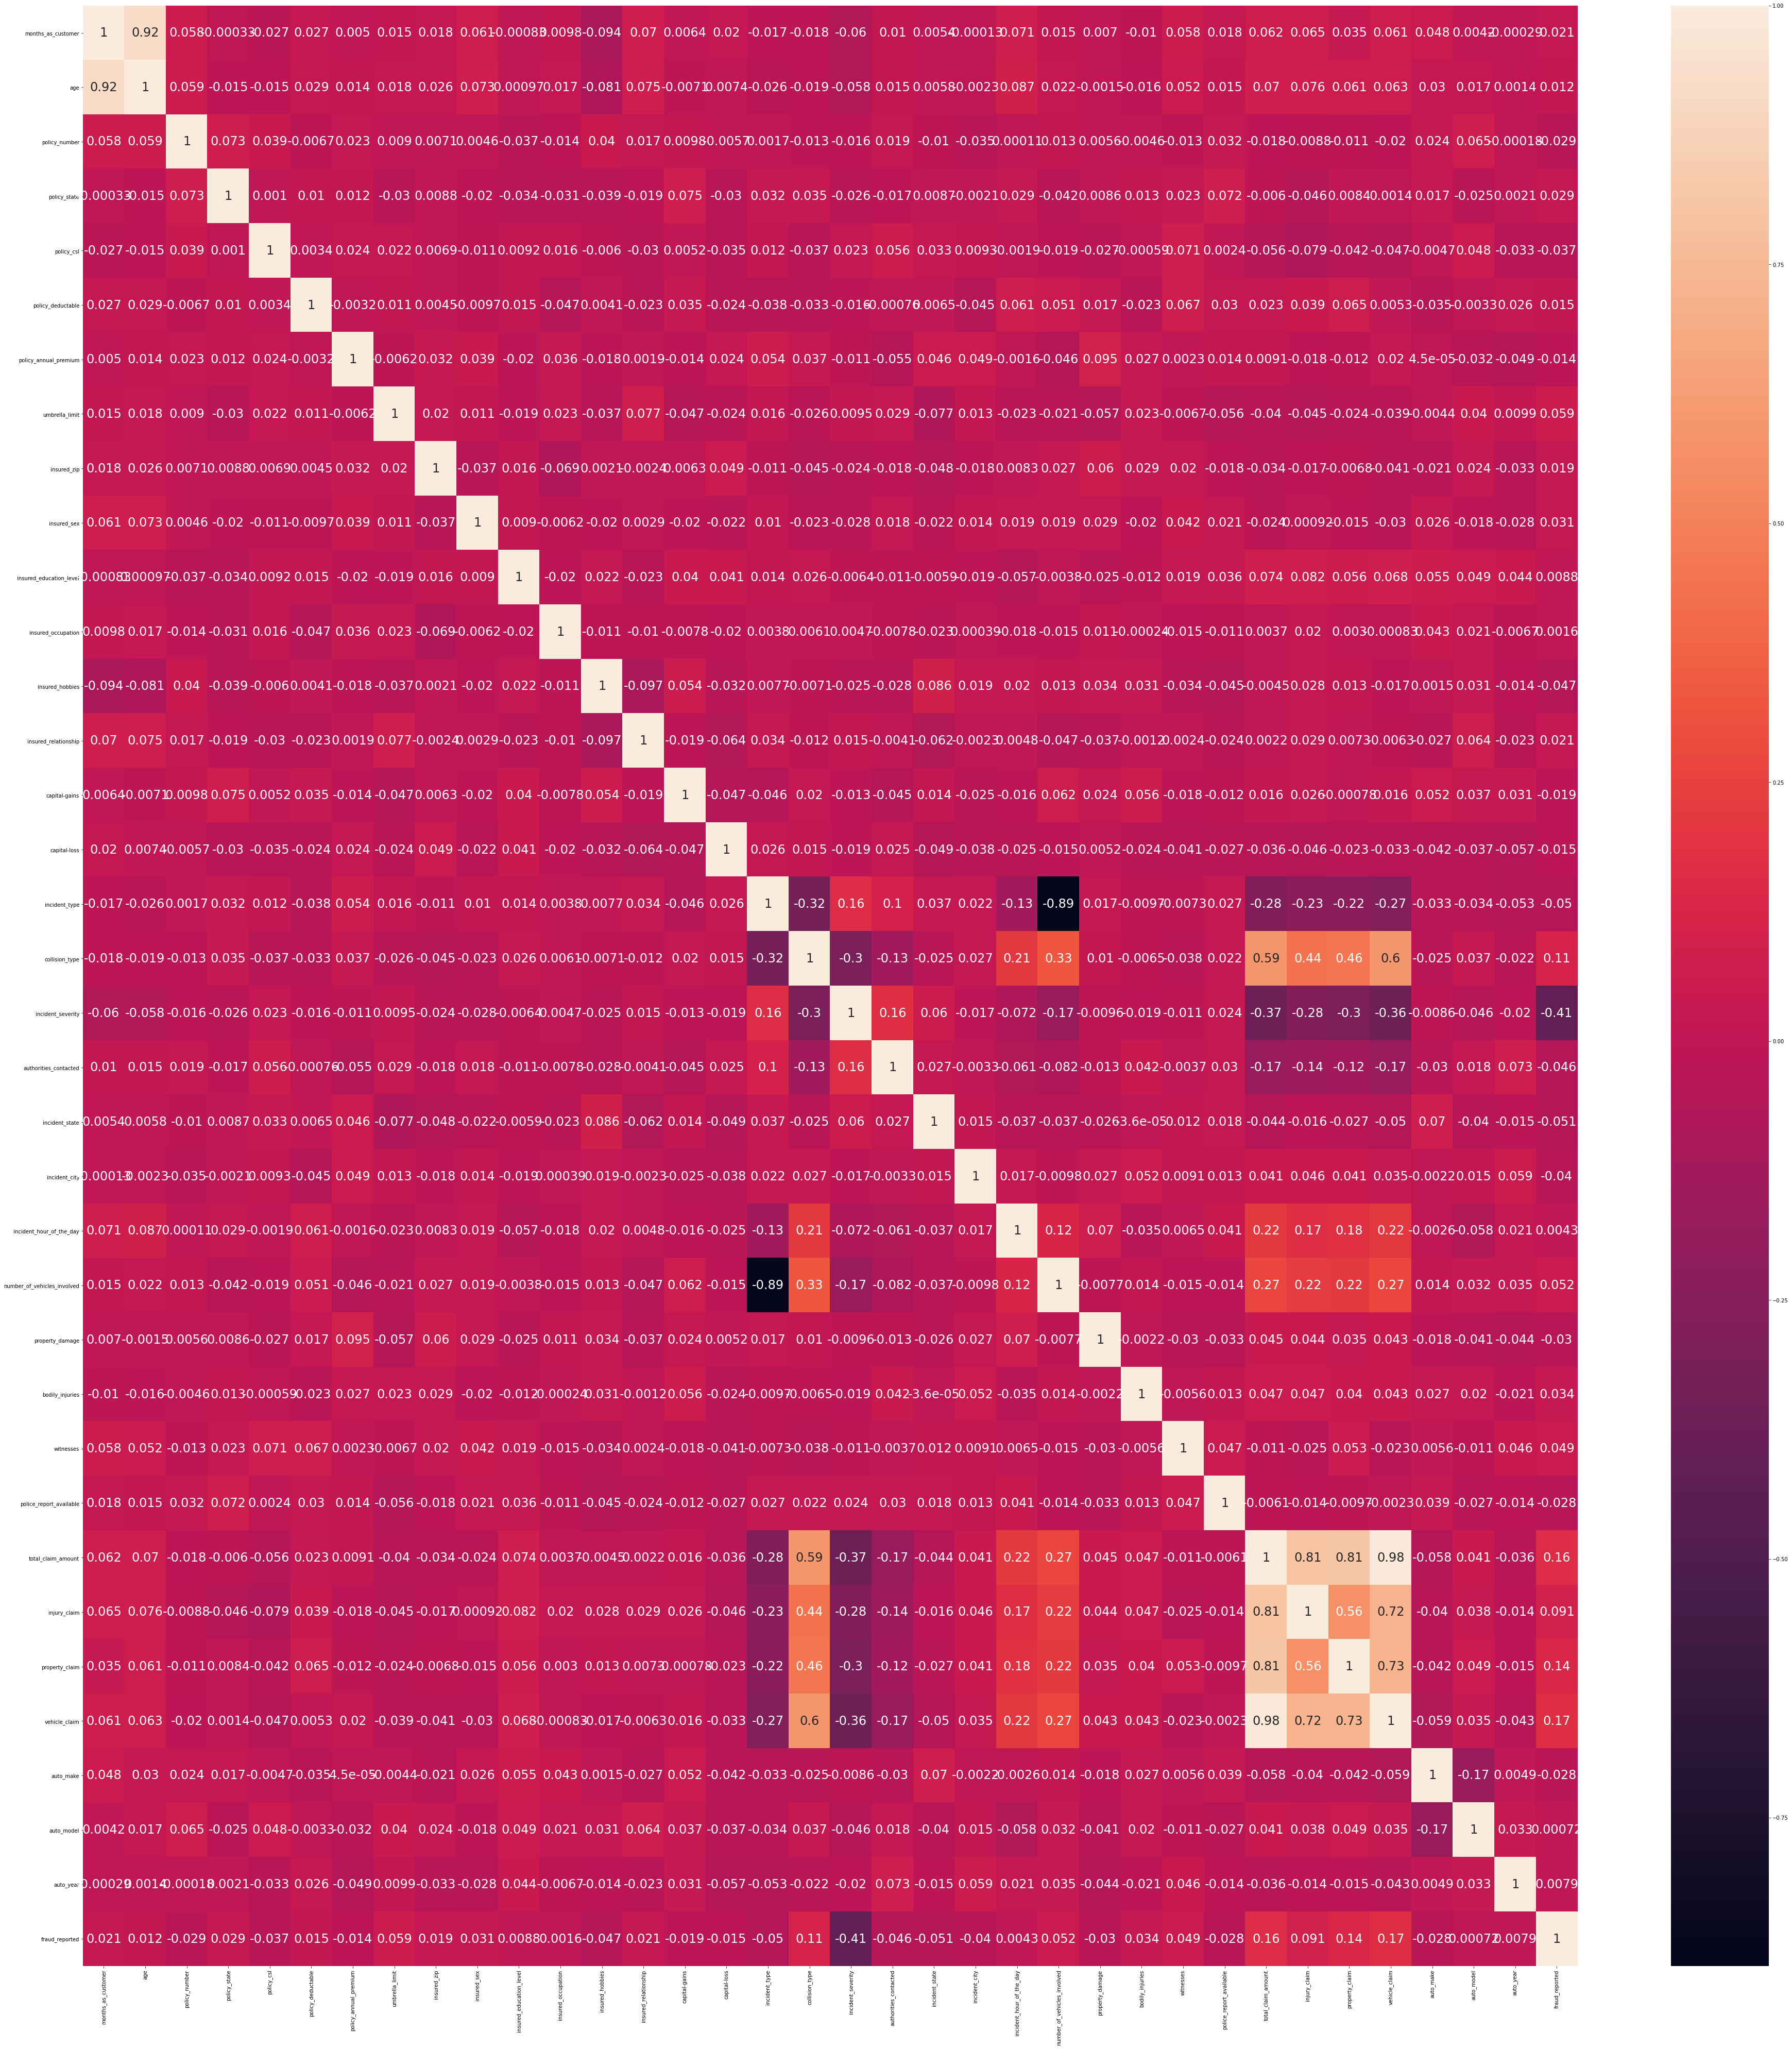

In [48]:
plt.figure(figsize=(65,70))
sns.heatmap(corr,annot=True,annot_kws={'size':24}) 
plt.show()

In [49]:
# Their is a correlation between age and months as costomer , hence dropping age since it gives less information .

In [ ]:
plt.scatter(data["age"],data["months_as_customer"])

In [51]:
data.drop(columns=["age"],inplace=True)

In [58]:
from sklearn.feature_selection import SelectKBest,f_classif
x=data.drop("fraud_reported",axis=1)
y=data.fraud_reported

best_features=SelectKBest(score_func=f_classif,k=25)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=["Column_names","Scores_obtained"]
print(feature_scores.nlargest(25,"Scores_obtained"))

                   Column_names  Scores_obtained
17            incident_severity       196.960603
30                vehicle_claim        29.718214
27           total_claim_amount        27.463776
29               property_claim        19.327729
16               collision_type        12.252860
28                 injury_claim         8.328776
6                umbrella_limit         3.441452
22  number_of_vehicles_involved         2.689100
19               incident_state         2.644427
15                incident_type         2.539153
25                    witnesses         2.451026
11              insured_hobbies         2.194239
18        authorities_contacted         2.098018
20                incident_city         1.631761
3                    policy_csl         1.382236
24              bodily_injuries         1.146656
8                   insured_sex         0.952144
23              property_damage         0.929077
1                 policy_number         0.865900
2                  p

In [59]:
final_data=data[["incident_severity",
                 "vehicle_claim",        
           "total_claim_amount",        
               "property_claim",        
               "collision_type",        
                 "injury_claim",        
                "umbrella_limit",       
  "number_of_vehicles_involved",        
               "incident_state",        
                 "incident_type",        
                    "witnesses",         
              "insured_hobbies",         
        "authorities_contacted",         
                "incident_city",         
                    "policy_csl",        
              "bodily_injuries",        
                  "insured_sex",       
              "property_damage",       
                 "policy_number",       
                  "policy_state",       
      "police_report_available",       
                    "auto_make",       
         "insured_relationship",       
            "months_as_customer",         
                 "insured_zip"      ]]
final_data

,incident_severity,vehicle_claim,total_claim_amount,property_claim,collision_type,injury_claim,umbrella_limit,number_of_vehicles_involved,incident_state,incident_type,...,bodily_injuries,insured_sex,property_damage,policy_number,policy_state,police_report_available,auto_make,insured_relationship,months_as_customer,insured_zip
0,0,52080,71610,13020,3,6510,0,1,4,2,...,1,1,2,521585,2,2,10,0,328,466132
1,1,3510,5070,780,0,780,5000000,1,5,3,...,0,1,0,342868,1,0,8,2,228,468176
2,1,23100,34650,3850,2,7700,5000000,3,1,0,...,2,0,1,687698,2,1,4,3,134,430632
3,0,50720,63400,6340,1,6340,6000000,1,2,2,...,1,0,0,227811,0,1,3,4,256,608117
4,1,4550,6500,650,0,1300,6000000,1,1,3,...,0,1,1,367455,0,1,0,4,228,610706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,61040,87200,8720,1,17440,0,1,0,2,...,0,0,2,941851,2,0,6,4,3,431289
996,0,72320,108480,18080,2,18080,0,1,4,2,...,2,0,2,186934,0,0,13,5,285,608177
997,1,52500,67500,7500,3,7500,3000000,3,0,0,...,2,0,0,918516,2,2,11,2,130,442797
998,0,36540,46980,5220,2,5220,5000000,1,1,2,...,0,1,0,533940,0,2,1,5,458,441714


In [60]:
x=final_data
y=data.fraud_reported

from imblearn.over_sampling import SMOTE
from collections import Counter

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)
sm=SMOTE()
samp=SMOTE(0.75)
x_trains,y_trains=samp.fit_resample(x_train,y_train)
print("Before transformation",format(Counter(y_train)))
print("After Transformation",format(Counter(y_trains)))



Before transformation Counter({0: 584, 1: 166})
After Transformation Counter({0: 584, 1: 438})


In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from time import time
start=time()
knn.fit(x_trains,y_trains)
print("Training Time:",time()-start) 
start=time()
y_pred=knn.predict(x_test)
print("Testing Time:",time()-start)

print(classification_report(y_test,y_pred))

Training Time: 0.00599980354309082
Testing Time: 0.06901836395263672
              precision    recall  f1-score   support

           0       0.68      0.67      0.68       169
           1       0.33      0.33      0.33        81

    accuracy                           0.56       250
   macro avg       0.50      0.50      0.50       250
weighted avg       0.57      0.56      0.56       250



In [62]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn,x,y,cv=6).mean()

0.7089916552437293

In [63]:
confusion_matrix(y_test,y_pred)

array([[114,  55],
       [ 54,  27]], dtype=int64)

In [64]:
from sklearn.model_selection import GridSearchCV
param_grid={"algorithm" : ["kd_tree","brute"],
           "leaf_size" : range(4,8),
           "n_neighbors" : [3,4,5,6,7]}

grdsrch=GridSearchCV(estimator=knn,param_grid=param_grid)

grdsrch.fit(x_trains,y_trains)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': range(4, 8),
                         'n_neighbors': [3, 4, 5, 6, 7]})

In [65]:
grdsrch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 4, 'n_neighbors': 3}

In [66]:
knn=KNeighborsClassifier(algorithm='kd_tree', leaf_size=4, n_neighbors=3)
from time import time
start=time()
knn.fit(x_trains,y_trains)
print("Training Time:",time()-start) 
start=time()
y_pred=knn.predict(x_test)
print("Testing Time:",time()-start)

print(classification_report(y_test,y_pred))

Training Time: 0.024001598358154297
Testing Time: 0.07102799415588379
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       169
           1       0.30      0.30      0.30        81

    accuracy                           0.55       250
   macro avg       0.48      0.48      0.48       250
weighted avg       0.55      0.55      0.55       250



In [67]:
# The accuracy decreased , lets drop it and check other models ......

In [68]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
start=time()
dt.fit(x_trains,y_trains)
print("Training Time:",time()-start)
start=time()
y_pred=dt.predict(x_test)
print("Training Time:",time()-start)

print(classification_report(y_test,y_pred))

Training Time: 0.2746119499206543
Training Time: 0.0
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       169
           1       0.59      0.47      0.52        81

    accuracy                           0.72       250
   macro avg       0.68      0.66      0.66       250
weighted avg       0.71      0.72      0.71       250



In [70]:
cross_val_score(dt,x,y,cv=20).mean()

0.788

In [71]:
param_grid={"criterion": ["gini","entropy"],  
           "max_depth": range(6,12),
           "min_samples_leaf": range(2,5),
           "min_samples_split": range(3,7)}

grdsrch=GridSearchCV(estimator=dt,param_grid=param_grid)
grdsrch.fit(x_trains,y_trains)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(6, 12),
                         'min_samples_leaf': range(2, 5),
                         'min_samples_split': range(3, 7)})

In [72]:
grdsrch.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 4}

In [73]:
dt=DecisionTreeClassifier(criterion='entropy',
 max_depth=6,
 min_samples_leaf= 2,
 min_samples_split= 4)
start=time()
dt.fit(x_trains,y_trains)
print("Training Time:",time()-start)
start=time()
y_pred=dt.predict(x_test)
print("Training Time:",time()-start)

print(classification_report(y_test,y_pred))

print(classification_report(y_test,y_pred))

Training Time: 0.02600860595703125
Training Time: 0.005006313323974609
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       169
           1       0.73      0.58      0.65        81

    accuracy                           0.80       250
   macro avg       0.78      0.74      0.75       250
weighted avg       0.79      0.80      0.79       250

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       169
           1       0.73      0.58      0.65        81

    accuracy                           0.80       250
   macro avg       0.78      0.74      0.75       250
weighted avg       0.79      0.80      0.79       250



In [74]:
# A good score of 80% has been achieved , lets try other algorihms as well . 

In [75]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()  
ad.fit(x_trains,y_trains)
y_pred=ad.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       169
           1       0.73      0.46      0.56        81

    accuracy                           0.77       250
   macro avg       0.75      0.69      0.70       250
weighted avg       0.76      0.77      0.75       250



In [76]:
cross_val_score(ad,x,y,cv=10).mean()

0.797

In [82]:
from sklearn.ensemble import BaggingClassifier
bag_cls=BaggingClassifier(ad,n_estimators=6,max_samples=0.8,bootstrap=True,random_state=10,oob_score=True)

bag_cls.fit(x_trains,y_trains)

BaggingClassifier(base_estimator=AdaBoostClassifier(), max_samples=0.8,
                  n_estimators=6, oob_score=True, random_state=10)

In [83]:
print("Before:",ad.score(x_test,y_test))
print("After:",bag_cls.score(x_test,y_test))

Before: 0.768
After: 0.76


In [84]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()

gbdt.fit(x_trains,y_trains)
y_pred=gbdt.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       169
           1       0.67      0.58      0.62        81

    accuracy                           0.77       250
   macro avg       0.74      0.72      0.73       250
weighted avg       0.77      0.77      0.77       250



In [85]:
confusion_matrix(y_test,y_pred)

array([[146,  23],
       [ 34,  47]], dtype=int64)

In [86]:
cross_val_score(gbdt,x,y,cv=10).mean()

0.834

In [87]:
param_grid={"max_depth": range(2,5),
           "min_samples_leaf": range(4,8),
           "min_samples_split": range(3,6)}
grdsrch=GridSearchCV(estimator=gbdt,param_grid=param_grid)
grdsrch.fit(x_trains,y_trains)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': range(2, 5),
                         'min_samples_leaf': range(4, 8),
                         'min_samples_split': range(3, 6)})

In [89]:
grdsrch.best_params_

{'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 4}

In [91]:
gbdt=GradientBoostingClassifier(max_depth=4, min_samples_leaf=6,min_samples_split=4)

gbdt.fit(x_trains,y_trains)
y_pred=gbdt.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       169
           1       0.69      0.54      0.61        81

    accuracy                           0.77       250
   macro avg       0.74      0.71      0.72       250
weighted avg       0.76      0.77      0.76       250



In [92]:
#The best accuracy achieved is from desition tree , having an acuracy of 80% , Hence finalisisng the same for the results .

In [94]:
import pickle
final="fraud.pickle"
pickle.dump(dt,open(final,"wb"))